# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [83]:
import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [84]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))
df.head(5)

El dataset que vamos a trabajar aquí tiene 6376 observaciones


,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,barrio_match,PH,apartment,house,...,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA,outlier_price_m2
0,-34.589,-58.417,170000.000,40.000,38.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-34.591,-58.418,90000.000,27.000,27.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-34.587,-58.437,150000.000,44.000,44.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-34.593,-58.428,154000.000,58.000,58.000,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-34.593,-58.428,154000.000,58.000,58.000,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [85]:
# Realizá la separación a continuación en esta celda
from sklearn.model_selection import train_test_split

X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print('Datos en Xtrain: {}'.format(X_train.shape)) 
print('Datos en Xtest: {}'.format(X_test.shape)) 
print('Datos en ytrain: {}'.format(y_train.shape)) 
print('Datos en ytest: {}'.format(y_test.shape)) 
print('Porcentaje de datos x: {}'.format( round(X_test.shape[0] / X.shape[0], 2) )) 
print('Porcentaje de datos y: {}'.format( round(y_test.shape[0] / y.shape[0], 2) )) 


Datos en Xtrain: (5100, 58)
Datos en Xtest: (1276, 58)
Datos en ytrain: (5100,)
Datos en ytest: (1276,)
Porcentaje de datos x: 0.2
Porcentaje de datos y: 0.2


## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [86]:
# En esta celda cargá el regresor y realizá el entrenamiento
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)
regressorModel = regressor.fit(X_train, y_train)

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [87]:
# Acá realizá la predicción
y_pred = regressorModel.predict(X_test)

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [88]:
# En esta celda calculá el rmse
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error (y_test, y_pred)
rmse = np.sqrt(rmse)
print('El valor de RMSE es: {}'.format(rmse))

El valor de RMSE es: 24582.961805828552


__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

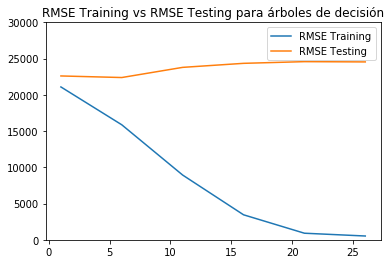

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline 

rmses_train = []
rmses_test = []
depth = [5,10,15,20,25,30]

for max_depth in depth:
    
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state = 0)
    regressorModel = regressor.fit(X_train, y_train)
    
    y_pred_train = regressorModel.predict(X_train)
    y_pred_test = regressorModel.predict(X_test)
    
    rmses_train.append(np.sqrt(mean_squared_error (y_train, y_pred_train)))
    rmses_test.append(np.sqrt(mean_squared_error (y_test, y_pred_test)))
    
plt.plot(range(1,30, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [90]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knnRegressor = KNeighborsRegressor(n_neighbors = 2)
knnregressorModel = knnRegressor.fit(X_train, y_train)
y_pred = knnregressorModel.predict(X_test)

rmse = mean_squared_error (y_test, y_pred)
rmse = np.sqrt(rmse)
print('El valor de RMSE es: {}'.format(rmse))


El valor de RMSE es: 24922.81292250801


__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [91]:
# Calculá los cambio en el rmse en esta celda

rmses_train = []
rmses_test = []
neighbors = np.arange(1,30)

for n_neighbors in neighbors:
    knnRegressor = KNeighborsRegressor(n_neighbors = n_neighbors)
    knnregressorModel = knnRegressor.fit(X_train, y_train)
    
    y_pred_train = knnregressorModel.predict(X_train)
    y_pred_test = knnregressorModel.predict(X_test)
    
    rmses_train.append(np.sqrt(mean_squared_error (y_train, y_pred_train)))
    rmses_test.append(np.sqrt(mean_squared_error (y_test, y_pred_test)))
    


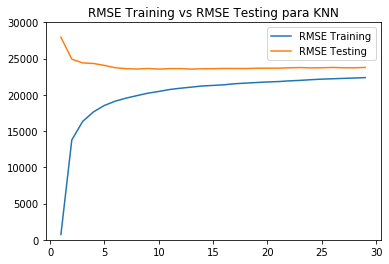

In [92]:
plt.plot(range(1,30, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [93]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [94]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [95]:
# Calculá en esta celda los cross_val_score
from sklearn.model_selection import cross_val_score

max_depth = 5
folds = 10
regressor = DecisionTreeRegressor(max_depth=max_depth, random_state = 0)
regressor_scores = cross_val_score(regressor, X, y, scoring='neg_mean_squared_error', cv=folds)
mse = nmsq2rmse(regressor_scores)
print(mse)

[23075.81707882 22701.1662687  22811.3397053  22542.96932204
 23162.03968873 21231.97224167 22694.34021123 23307.83887209
 22578.06628607 23962.30224595]


Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [96]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [97]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [98]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,102000.000,106860.461,4860.461
1,72000.000,87922.564,15922.564
2,118000.000,122652.790,4652.790
3,97000.000,106860.461,9860.461
4,70000.000,86465.951,16465.951
5,160000.000,152549.029,7450.971
6,165000.000,143548.933,21451.067
7,125000.000,127089.862,2089.862
8,149000.000,131012.614,17987.386
9,155000.000,115670.081,39329.919
